In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

L2 = [10 ** p for p in range(2, 6)]
# L2 = [5000, 10000, 20000, 40000]
RHO = [100, 500, 1000]
MAX_ITER = 10
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [100, 1000, 10000, 100000],
 'rho': [100, 500, 1000],
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 100, 'rho': 100, 'max_iterations': 10, 't': 2158}


norm E 0.8547220509188103
norm D 768.114514713382
diag norm: 9.831869809059674
diag_diff: 7.967472232537504

norm E 0.7722396931250064
norm D 798.9905673470647
diag norm: 9.614011513585275
diag_diff: 5.948416892576245
rho * change E: 26.179819141754535

norm E 0.757487749908573
norm D 807.9777197289702
diag norm: 9.473477235934398
diag_diff: 4.462557124866795
rho * change E: 7.922053831617656

norm E 0.7523595890282657
norm D 812.1095291590548
diag norm: 9.39480463141506
diag_diff: 3.3843580938162674
rho * change E: 4.270366342487544

norm E 0.7514746539796513
norm D 814.3941131099916
diag norm: 9.348241323655747
diag_diff: 2.593689146446966
rho * change E: 2.7157283204823455

norm E 0.7522178982839152
norm D 815.8311695575752
diag norm: 9.318849483965856
diag_diff: 2.007630274142123
rho * change E: 1.9512618639538795

norm E 0.753430290447779
norm D 816.8001298053344
diag norm: 9.29947753466549
diag_diff: 1.5683812513245827
rho * change E: 1.5093338435617767

norm E 0.7546911426833812

norm E 0.16360088930695507
norm D 791.4323150196702
diag norm: 2.0757457980303586
diag_diff: 1.9722478884011434

norm E 0.162177368688244
norm D 813.3757018074922
diag norm: 2.1040127100487758
diag_diff: 1.870843391080898
rho * change E: 2.7104293340471197

norm E 0.1613174823648634
norm D 817.7006825935078
diag norm: 2.0961619227355492
diag_diff: 1.7392100093544818
rho * change E: 0.863460098642917

norm E 0.16054507311010557
norm D 819.5052006173053
diag norm: 2.087073102559303
diag_diff: 1.6145993648782557
rho * change E: 0.5068227264853942

norm E 0.15985921029966704
norm D 820.6363992215032
diag norm: 2.078619152123228
diag_diff: 1.4986282513806557
rho * change E: 0.382973755058228

norm E 0.15925817863158734
norm D 821.5108312597453
diag norm: 2.0711347522618806
diag_diff: 1.391147681807862
rho * change E: 0.3231831537440908

norm E 0.15873563228224535
norm D 822.2619197616895
diag norm: 2.064621223649179
diag_diff: 1.2916512159379863
rho * change E: 0.28519391061238286

norm E 0

norm E 0.02002948242993472
norm D 794.4913363161924
diag norm: 0.2519425418380693
diag_diff: 0.2509783713288016

norm E 0.020135431543914912
norm D 816.5241672830984
diag norm: 0.25782820495177833
diag_diff: 0.25476550230306505
rho * change E: 0.2807033230091642

norm E 0.020130612090248863
norm D 820.6049901375665
diag norm: 0.25805713765603555
diag_diff: 0.25285361390227545
rho * change E: 0.08812713789466907

norm E 0.02011471903965811
norm D 822.017083389205
diag norm: 0.25792662922762305
diag_diff: 0.2505892469216089
rho * change E: 0.0466425442554252

norm E 0.02009645221115369
norm D 822.6693316814622
diag norm: 0.25771544573362243
diag_diff: 0.2482597595165321
rho * change E: 0.029987076938039148

norm E 0.02007752243855814
norm D 823.0265691972169
diag norm: 0.2574773962375515
diag_diff: 0.24592160356535198
rho * change E: 0.02157558209690917

norm E 0.020058422939887494
norm D 823.2462485976745
diag norm: 0.2572287217019634
diag_diff: 0.24359170265055088
rho * change E: 0.016

norm E 0.0020544757181347683
norm D 795.0542636811628
diag norm: 0.025854901667828507
diag_diff: 0.025854108842839063

norm E 0.002072345932740032
norm D 817.1243978399358
diag norm: 0.02655380991374594
diag_diff: 0.026533390133588092
rho * change E: 0.028258405731988755

norm E 0.0020738166104652795
norm D 821.2307156056886
diag norm: 0.026602575833224444
diag_diff: 0.026561876778918497
rho * change E: 0.008916408753452948

norm E 0.002073944846491779
norm D 822.652734034813
diag norm: 0.026612308690064285
diag_diff: 0.02655120204196162
rho * change E: 0.004722404330847647

norm E 0.0020737616082798557
norm D 823.3061761209018
diag norm: 0.026613009991235097
diag_diff: 0.026531461140814557
rho * change E: 0.003015990247152735

norm E 0.0020734717945676893
norm D 823.6596405519902
diag norm: 0.026610534175084546
diag_diff: 0.026508536012063624
rho * change E: 0.002137173004297407

norm E 0.002073136353302956
norm D 823.8721582609556
diag norm: 0.026606661149965606
diag_diff: 0.02648421

norm E 0.8553264383569246
norm D 768.3727085676865
diag norm: 9.832825446395836
diag_diff: 5.9849962959901575

norm E 0.7613136271227021
norm D 811.7451086223064
diag norm: 9.556793982967383
diag_diff: 3.3876207503890923
rho * change E: 142.54588917000515

norm E 0.7582171516379786
norm D 820.1959252010895
diag norm: 9.446846663079103
diag_diff: 1.9532892000311841
rho * change E: 32.215585886243645

norm E 0.7600975645787134
norm D 823.2769047409
diag norm: 9.390953488504945
diag_diff: 1.13707819135324
rho * change E: 16.0018890098382

norm E 0.76199258268998
norm D 824.8279536524925
diag norm: 9.360618259435874
diag_diff: 0.6685607371257405
rho * change E: 9.971456358199111

norm E 0.7633496411962172
norm D 825.7768736803356
diag norm: 9.343735853839405
diag_diff: 0.39862244420987963
rho * change E: 6.895159699973867

norm E 0.7642493786806049
norm D 826.3982888658587
diag norm: 9.334302335471385
diag_diff: 0.24318084260728326
rho * change E: 5.165699284302873

norm E 0.76484001491123

norm E 0.16354774493131113
norm D 792.3400104282446
diag norm: 2.075654459411236
diag_diff: 1.655011097640737

norm E 0.15877413584758407
norm D 817.2879372008999
diag norm: 2.067197440325763
diag_diff: 1.28378615835983
rho * change E: 13.822661379778323

norm E 0.1577212019415271
norm D 824.45505737658
diag norm: 2.0565917803918476
diag_diff: 0.9901859707147866
rho * change E: 4.516387557162549

norm E 0.15716937108260098
norm D 828.3081211347619
diag norm: 2.049858378474846
diag_diff: 0.7643471409336625
rho * change E: 2.7164645140714088

norm E 0.1569062257487379
norm D 830.7619649246758
diag norm: 2.04569627199072
diag_diff: 0.5906762465191241
rho * change E: 1.824671479780676

norm E 0.15680968042541332
norm D 832.4452410452668
diag norm: 2.04308746500497
diag_diff: 0.456940570490805
rho * change E: 1.2908153129945017

norm E 0.15680079111351064
norm D 833.6180449377784
diag norm: 2.0414049509207692
diag_diff: 0.3538394236329958
rho * change E: 0.956819446493267

norm E 0.15683177

norm E 0.01991452574469547
norm D 794.6617788551594
diag norm: 0.25192323913384584
diag_diff: 0.24401677361530327

norm E 0.019875142937577944
norm D 816.6103297306103
diag norm: 0.2556869495338872
diag_diff: 0.23777632076732225
rho * change E: 1.3830702229453875

norm E 0.01982378762176083
norm D 820.7320323048399
diag norm: 0.25536158500980005
diag_diff: 0.22764905195585491
rho * change E: 0.4335307425899052

norm E 0.0197707423878371
norm D 822.2547740359915
diag norm: 0.2548017141040583
diag_diff: 0.2176756246198587
rho * change E: 0.239012138693461

norm E 0.01971963111987387
norm D 823.0611832327478
diag norm: 0.2542186433535909
diag_diff: 0.2080760377530917
rho * change E: 0.16797777935438846

norm E 0.01967124329724044
norm D 823.6031184038119
diag norm: 0.25365413103924483
diag_diff: 0.19888200981393644
rho * change E: 0.13595065231054163

norm E 0.01962571888003534
norm D 824.0294380638684
diag norm: 0.25312064838613463
diag_diff: 0.19008976571773933
rho * change E: 0.1190315

norm E 0.0020571972588497834
norm D 794.7338300928805
diag norm: 0.02585568722586156
diag_diff: 0.025823341037066908

norm E 0.0020706768549768884
norm D 816.8101090188228
diag norm: 0.02648315206162161
diag_diff: 0.026341973777957012
rho * change E: 0.1408497487990684

norm E 0.0020711137905901106
norm D 820.9061379652339
diag norm: 0.026517921606112823
diag_diff: 0.02626548359549771
rho * change E: 0.044370747499316555

norm E 0.002070323196634596
norm D 822.3229436258339
diag norm: 0.026515300613473073
diag_diff: 0.026151443955254525
rho * change E: 0.023489111511929138

norm E 0.002069254468916481
norm D 822.9739230982711
diag norm: 0.026504159800059813
diag_diff: 0.02602917311351988
rho * change E: 0.015014332729422427

norm E 0.0020680954876135128
norm D 823.3265248672553
diag norm: 0.02649007075339734
diag_diff: 0.025904379547255628
rho * change E: 0.01067744218185288

norm E 0.0020669018616761947
norm D 823.5392685193523
diag norm: 0.026474721352879267
diag_diff: 0.025778808792

norm E 0.8550833972444022
norm D 768.9363695485955
diag norm: 9.832339510973494
diag_diff: 5.506227548884191

norm E 0.761287839667579
norm D 813.5077459594522
diag norm: 9.539552523781836
diag_diff: 2.8777310842756463
rho * change E: 287.5727873010281

norm E 0.758958081638521
norm D 821.9184025588208
diag norm: 9.428714620338281
diag_diff: 1.5306376434542035
rho * change E: 64.18409267170966

norm E 0.7609062251974927
norm D 824.9208238306128
diag norm: 9.376342426421006
diag_diff: 0.8217173905018469
rho * change E: 30.894431439089036

norm E 0.7626006784431242
norm D 826.4357253063
diag norm: 9.35026010045823
diag_diff: 0.4474627512294765
rho * change E: 18.780536456215753

norm E 0.7637140308387986
norm D 827.3580776283974
diag norm: 9.337043023435541
diag_diff: 0.25103773823505865
rho * change E: 12.959317977907022

norm E 0.7644061309245734
norm D 828.007050575001
diag norm: 9.330417452847398
diag_diff: 0.15016591491775705
rho * change E: 9.93957229327063

norm E 0.76484210385147

norm E 0.1636762194688862
norm D 791.9395527510651
diag norm: 2.075551140889081
diag_diff: 1.4669187350667607

norm E 0.15796342639819905
norm D 823.026495959294
diag norm: 2.0618289846699787
diag_diff: 1.004761653501435
rho * change E: 28.99195684400023

norm E 0.15736172531602297
norm D 831.5998499499306
diag norm: 2.0544646837019984
diag_diff: 0.688417161838189
rho * change E: 8.189997761703376

norm E 0.15726139963179958
norm D 835.3531867183702
diag norm: 2.0506360053129287
diag_diff: 0.4723714526372826
rho * change E: 4.223139333599767

norm E 0.157325328973607
norm D 837.376988097049
diag norm: 2.0484850051611274
diag_diff: 0.3246229271643726
rho * change E: 2.5744728481010504

norm E 0.157421394832584
norm D 838.6302098700415
diag norm: 2.047176968660672
diag_diff: 0.223418547512031
rho * change E: 1.7927218977114943

norm E 0.1575080393258479
norm D 839.4791424970311
diag norm: 2.0463384429201588
diag_diff: 0.15399886336690902
rho * change E: 1.3588671187668788

norm E 0.15757

norm E 0.019979166866607632
norm D 794.5368773296725
diag norm: 0.25193946403274203
diag_diff: 0.23561002647046508

norm E 0.019833943316185567
norm D 816.4460037393093
diag norm: 0.25429831804087805
diag_diff: 0.2198918397342261
rho * change E: 2.736994429122664

norm E 0.019752718888471493
norm D 820.7693156536269
diag norm: 0.25365497677655136
diag_diff: 0.2022900000208104
rho * change E: 0.8682795153377847

norm E 0.01968010805355201
norm D 822.5834786110762
diag norm: 0.25291446441616555
diag_diff: 0.18589900978722998
rho * change E: 0.5094591851189739

norm E 0.01961555097741579
norm D 823.7282427569456
diag norm: 0.2522312363924962
diag_diff: 0.17080100316132443
rho * change E: 0.3847382326824022

norm E 0.01955875325056567
norm D 824.6199988760359
diag norm: 0.2516304269824604
diag_diff: 0.1569338249117169
rho * change E: 0.32406710232377206

norm E 0.019508979604271913
norm D 825.3939544989711
diag norm: 0.2511113044236907
diag_diff: 0.14420856941621268
rho * change E: 0.28570

norm E 0.002054352171691666
norm D 794.7171973374499
diag norm: 0.025854874234362578
diag_diff: 0.02574732328766684

norm E 0.002064616065594511
norm D 816.8103048421839
diag norm: 0.0264316032570738
diag_diff: 0.026102667153194235
rho * change E: 0.2813359307131063

norm E 0.0020640716931845157
norm D 820.8880541908017
diag norm: 0.0264538301532054
diag_diff: 0.02589938856885792
rho * change E: 0.0881246237383857

norm E 0.0020624479267539785
norm D 822.2952808825268
diag norm: 0.02644080678498487
diag_diff: 0.025661719855953342
rho * change E: 0.046586151430797904

norm E 0.0020605936508106717
norm D 822.9438893945795
diag norm: 0.026419889253736725
diag_diff: 0.02541786097374513
rho * change E: 0.029896714138051932

norm E 0.002058676455022758
norm D 823.2985856440345
diag norm: 0.026396375307488413
diag_diff: 0.025173367600855402
rho * change E: 0.021480590632624315

norm E 0.0020567444658306892
norm D 823.5160922553665
diag norm: 0.02637185230056374
diag_diff: 0.024929891911581615

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.3176079394875636 achieved with {'l2': 100, 'rho': 100, 'max_iterations': 10, 't': 2158}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 0.8540658689662187
norm D 768.6174482177636
diag norm: 9.830977510781391
diag_diff: 7.967230068941614

norm E 0.7714912405517506
norm D 799.4428338069232
diag norm: 9.61318248468945
diag_diff: 5.948271716308144
rho * change E: 26.16694859681626

norm E 0.7567456216890003
norm D 808.4206168257815
diag norm: 9.47282706544409
diag_diff: 4.462545569094105
rho * change E: 7.925632862009251

norm E 0.7516310556322493
norm D 812.5506490663702
diag norm: 9.394334839252096
diag_diff: 3.3843124279564742
rho * change E: 4.271125786047628

norm E 0.7507704632473109
norm D 814.8319743997597
diag norm: 9.347890400127822
diag_diff: 2.593671718553114
rho * change E: 2.7109846792029506

norm E 0.7515291033223767
norm D 816.2387489087622
diag norm: 9.318527977107234
diag_diff: 2.00758400005322
rho * change E: 1.94852929228427

norm E 0.752751381800342
norm D 817.190430126148
diag norm: 9.299115686841372
diag_diff: 1.5683546908340567
rho * change E: 1.5085125338732763

norm E 0.7540153644930532
no

In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 1500 users
Average Recall@20 0.487
Average Recall@100 0.659
Average nDCG@100 0.322


## Plot amount of items from long tail recommended

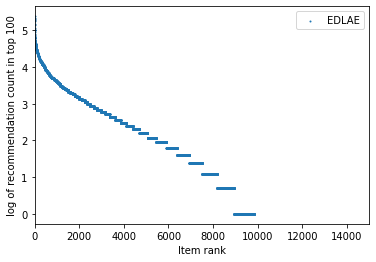

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EDLAE"], k=100)